In [406]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Making Sense of Data ...


For this notebook you need to have the scikit learn (http://scikit-learn.org/stable/index.html) module installed.

```bash
pip install scikit-learn
```

# Feature Spaces

## One-dimensional Features Space 

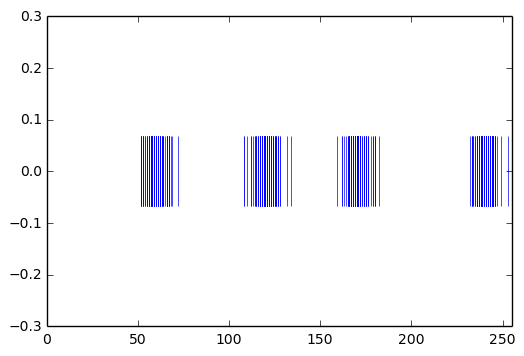

In [486]:
from sklearn.datasets.samples_generator import make_blobs


centers = [[60], [120], [170], [240]]
data, _ = make_blobs(n_samples=400, n_features=1, cluster_std=4, centers=centers)

data_1d = np.rint(data).astype(np.uint8)
plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

y = np.zeros(np.shape(data))
plt.plot(data_1d , y, 'b|', ms=50)
#plt.axis('off')
plt.show()

## Two-dimensional Features Space 

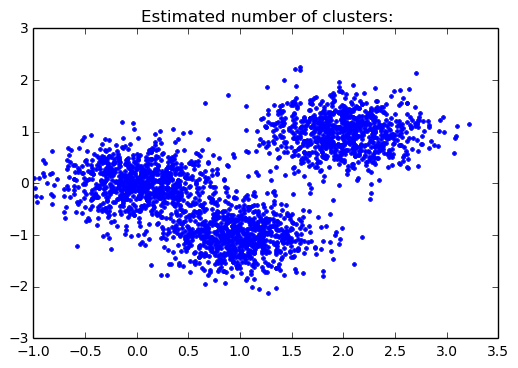

In [450]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[2, 1], [0, 0], [1, -1]]
data_2d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)

plt.plot(data_2d[:,0], data_2d[:,1], 'b.')

plt.title('Estimated number of clusters:')
plt.show()

## Three-dimensional Features Space 

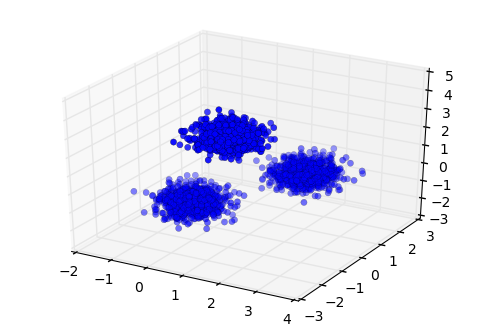

In [291]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs


centers = [[2, 1, 0], [0, -1, -1], [1, -1, 3]]
data_3d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)
x, y, z = data_3d[:,0], data_3d[:,1], data_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidth=0.2)

plt.show()

# How do we find clusters?

Humans are quite good in quickly finding clusters when looking at the data visualizations above. The problem is, how to make a machine find clusters.

In [447]:
from sklearn.cluster import MeanShift, estimate_bandwidth


def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=1000)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

Number of estimated clusters : 4


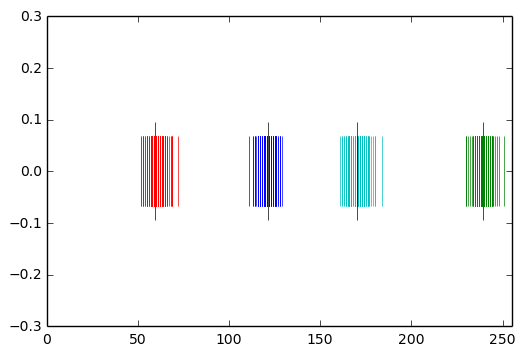

In [448]:
labels, cluster_centers, n_clusters = mean_shift(data_1d)

plt.cla()
plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x = data_1d[my_members, 0]
    y = np.zeros(np.shape(x))

    plt.plot(x , y, col + '|', ms=50)
    plt.plot(cluster_center[0] , 0, 'k|', ms=70)

plt.show()

Number of estimated clusters : 3


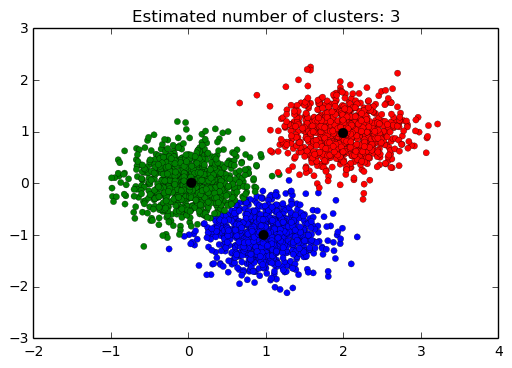

In [451]:
from itertools import cycle


labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col,  linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

Number of estimated clusters : 3


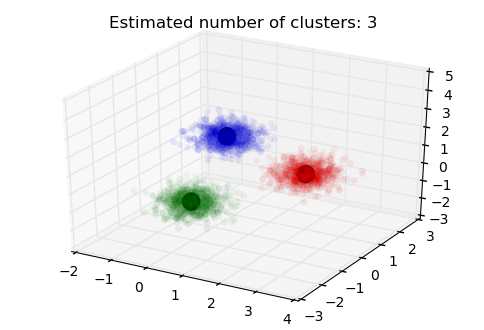

In [452]:
from itertools import cycle


labels, cluster_centers, n_clusters = mean_shift(data_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = data_3d[my_members,0], data_3d[my_members,1], data_3d[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

In [454]:
import pandas as pd

filename = './iris_data.csv'
df = pd.read_csv(filename)

I. setosa b
I. versicolor g
I. virginica r


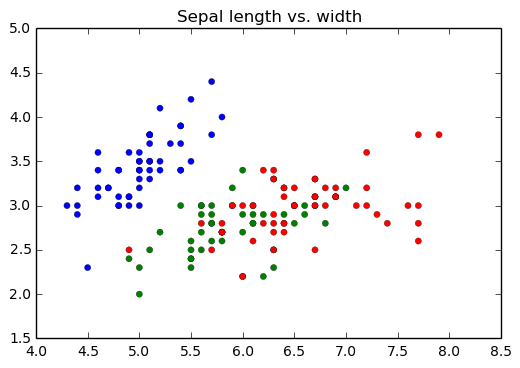

In [455]:
labels = np.unique(df['Species'])

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for label, col in zip(labels, colors):
    print(label, col)
    x = df[df['Species'] == label]['Sepal length']
    y = df[df['Species'] == label]['Sepal width']

    ax.scatter(x, y, c=col,  linewidth=0.2)
    
plt.title('Sepal length vs. width')
plt.show()

Number of estimated clusters : 3


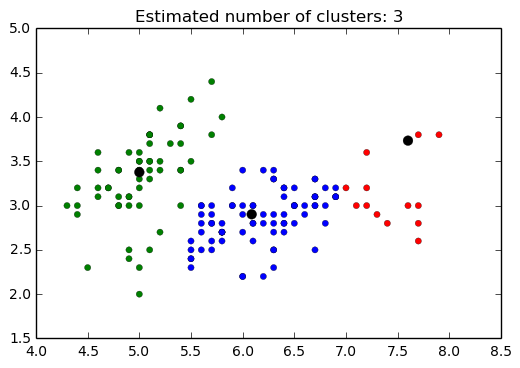

In [456]:

data_2d = df[['Sepal length', 'Sepal width']].as_matrix()
labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col,  linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

# How does this work?

  * http://stackoverflow.com/questions/4831813/image-segmentation-using-mean-shift-explained
  * https://en.wikipedia.org/wiki/Mean_shift
  * https://github.com/mattnedrich/MeanShift_py

```bash
git clone https://github.com/mattnedrich/MeanShift_py.git
```


# What else can I use this for?

For example for image segmentation

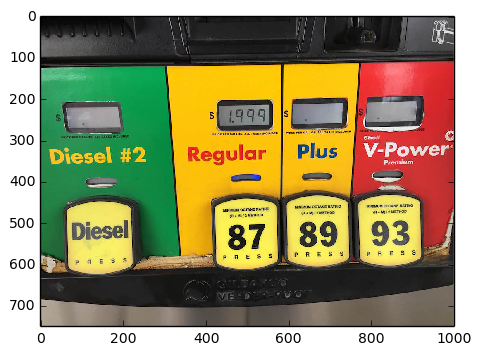

In [475]:
import os
import cv2

url = 'http://graphics.cs.williams.edu/data/images/peppers.png'
# url = 'http://graphics.cs.williams.edu/data/images/mandrill.png'
url = 'https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg'
webget.download(url)

img = cv2.imread(os.path.basename(url))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

plt.imshow(img, interpolation='none')

Number of estimated clusters : 4


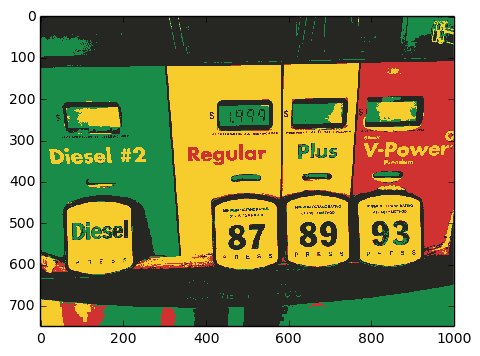

In [478]:
img_lst = img.reshape((img.shape[0] * img.shape[1], 3))

labels, cluster_centers, n_clusters = mean_shift(img_lst)

label_img = labels.reshape(height, width)
for l in range(n_clusters):
    img[label_img == l] = cluster_centers[l]
    
plt.imshow(img, interpolation='none')

In [464]:
print(cluster_centers)

[[ 150.80884977  182.6737441    86.74763094]
 [ 185.34386688   46.19654778   38.84580752]
 [  72.74311758    9.86972348    8.35216567]
 [ 201.63949843    0.          188.69278997]
 [  57.47204969    0.          177.27329193]]
